C:\Users\KANAK\AppData\Local\Temp\ipykernel_10768\1614305044.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Columns in the dataset: Index(['Sensor 1', 'Sensor 2', 'Sensor 3', 'Sensor 4', 'Sensor 5', 'Sensor 6',
       'Class'],
      dtype='object')


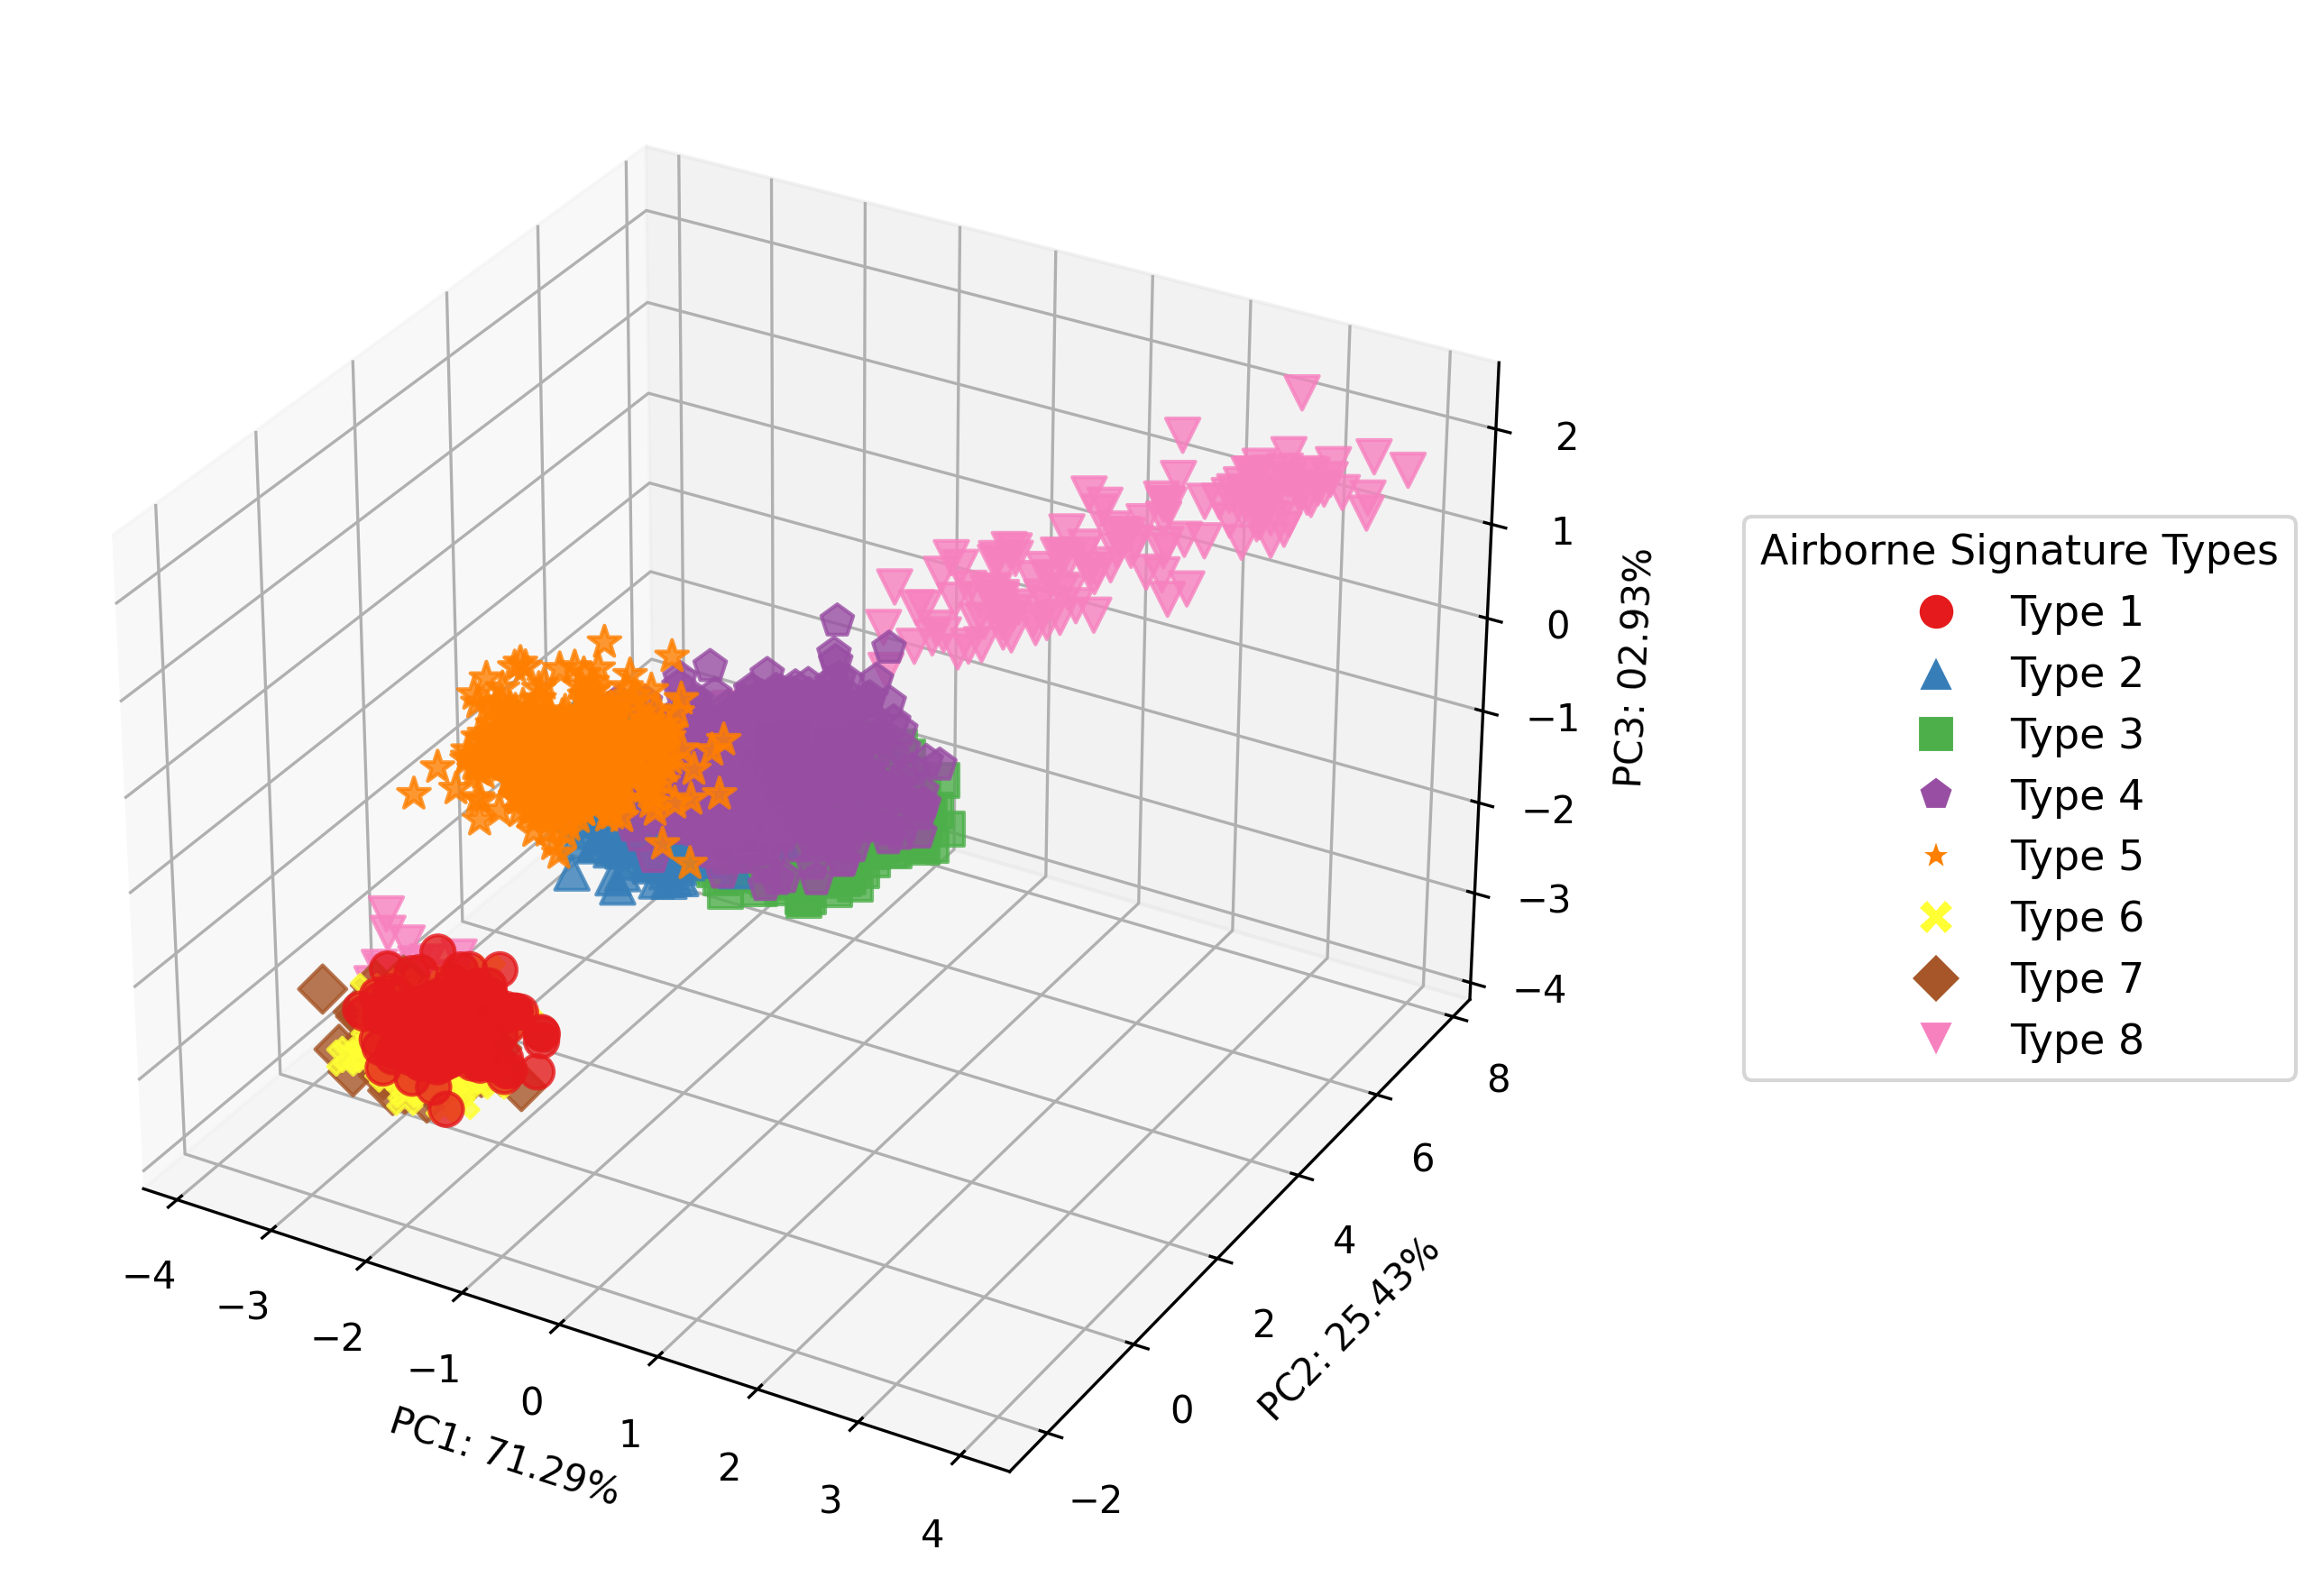

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
from sklearn.decomposition import SparsePCA
from sklearn.preprocessing import StandardScaler

# Load the dataset 
data = pd.read_csv(r'C:\Users\KANAK\Desktop\Codes\LoRaIoT\GitHub/1.PHC_RawDataset.csv')

# Print columns to verify names and select relevant features and label
print("Columns in the dataset:", data.columns)


feature_columns = ['Sensor 1', 'Sensor 2', 'Sensor 3', 'Sensor 4', 'Sensor 5', 'Sensor 6']  
label_column = 'Class'  

# Separate features and label
X = data[feature_columns]
y = data[label_column]

# Standardize features before SPCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Sparse PCA to reduce to 3 components for 3D plotting
spca = SparsePCA(n_components=3, random_state=42)
X_spca = spca.fit_transform(X_scaled)

# Convert SPCA results to DataFrame for easier plotting
spca_df = pd.DataFrame(X_spca, columns=['SPCA1', 'SPCA2', 'SPCA3'])
spca_df[label_column] = y

# Define unique color and marker for each class
unique_classes = spca_df[label_column].unique()
color_palette = sns.color_palette("Set1", len(unique_classes))  # Set1 palette for high contrast
class_colors = {class_value: color_palette[i] for i, class_value in enumerate(unique_classes)}
markers = ['o', '^', 's', 'p', '*', 'X', 'D', 'v']  # Different markers for each class

# Initialize the 3D plot
fig = plt.figure(figsize=(18, 6),dpi=300)
ax = fig.add_subplot(111, projection='3d')

# Define stronger jitter, unique offsets, and scaling factors for each class to improve separation
jitter_strength = 0.25
scaling_factors = np.linspace(0.9, 1.2, len(unique_classes))  # Different scale per class
offsets = np.linspace(-0.2, 0.2, len(unique_classes))  # Unique offset per class

# Plot each class with distinct colors, markers, jitter, and offsets
for i, class_value in enumerate(unique_classes):
    class_data = spca_df[spca_df[label_column] == class_value]
    ax.scatter(
        (class_data['SPCA1'] * scaling_factors[i]) + np.random.normal(0, jitter_strength, class_data.shape[0]) + offsets[i],
        (class_data['SPCA2'] * scaling_factors[i]) + np.random.normal(0, jitter_strength, class_data.shape[0]) + offsets[i],
        (class_data['SPCA3'] * scaling_factors[i]) + np.random.normal(0, jitter_strength, class_data.shape[0]) + offsets[i],
        label=f'Class {class_value}',
        color=class_colors[class_value],  # Use specific color for each class
        marker=markers[i % len(markers)],  # Cycle through markers
        s=80,  # Adjust marker size
        alpha=0.8  # Transparency for better visibility
    )

# Set axis labels and title
ax.set_xlabel('PC1: 71.29%')
ax.set_ylabel('PC2: 25.43%')
ax.set_zlabel('PC3: 02.93%')


# Adjust legend to be outside the plot
handles = [
    plt.Line2D([0], [0], marker=markers[i % len(markers)], color='w', 
               markerfacecolor=class_colors[class_value], markersize=10, 
               label=f'Type {class_value}')
    for i, class_value in enumerate(unique_classes)
]

# Display the legend outside the plot
plt.legend(
    handles=handles, 
    loc="center left", 
    bbox_to_anchor=(1.10, 0.5),  # Position legend outside plot
    title="Airborne Signature Types",
    title_fontsize='11', 
    fontsize='11', 
    frameon=True
)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to accommodate the legend
plt.show()